<a href="https://colab.research.google.com/github/souban1234/KERAS_SERIES_WITH_BACKEND_TENSORFLOW/blob/main/Categorizing_Faces_based_on_Emotions/Categorizing_Faces_based_on_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 2: Categorizing Faces based on Emotions 

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"souvikbanerjee1","key":"5dd454b2c5338ca4f83ec4ce5ec6b08e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# changing the permission
!chmod 600 ~/.kaggle/kaggle.json

**Downloading the dataset from kaggle API**

In [ ]:
!kaggle datasets download -d debanga/facial-expression-recognition-challenge

100% 320M/321M [00:03<00:00, 102MB/s]
100% 321M/321M [00:03<00:00, 84.6MB/s]


In [ ]:
!pip install zip_files

**Extracting Zip file**

In [ ]:
from zipfile import ZipFile
file_name="/content/facial-expression-recognition-challenge.zip"
with ZipFile(file_name,"r") as Zip:
  Zip.extractall()
  print("done")

done


**Read the data**

In [ ]:
import pandas as pd
facial_df=pd.read_csv("/content/metadata_processed.csv")
facial_df

,label,image,emotion
0,4,59 71 89 118 139 160 183 222 212 148 77 16 16 ...,Sad
1,0,144 149 129 114 119 124 125 135 145 141 147 15...,Angry
2,4,90 97 105 42 41 41 37 40 36 55 104 128 145 162...,Sad
3,1,69 72 80 87 95 102 112 123 131 137 143 151 159...,Disgust
4,0,134 135 136 137 142 122 46 47 36 25 21 18 13 1...,Angry
...,...,...,...
35877,0,25 21 21 18 30 102 144 147 150 161 179 179 178...,Angry
35878,0,117 115 96 99 141 160 165 175 182 179 185 193 ...,Angry
35879,5,184 178 153 83 83 106 93 81 102 103 82 119 111...,Surprise
35880,2,205 219 122 42 55 56 58 57 81 90 81 93 111 120...,Fear


In [ ]:
facial_df.shape

(35882, 3)

In [ ]:
facial_df.columns

Index(['label', 'image', 'emotion'], dtype='object')

In [ ]:
facial_df.label.value_counts()

6    5126
5    5126
4    5126
3    5126
2    5126
1    5126
0    5126
Name: label, dtype: int64

In [ ]:
facial_submission=pd.read_csv("example_submission.csv")
facial_submission.head()


,3
0,4
1,0
2,4
3,3
4,3


In [ ]:
facial_df.emotion.value_counts()

Fear        5126
Surprise    5126
Sad         5126
Happy       5126
Disgust     5126
Neutral     5126
Angry       5126
Name: emotion, dtype: int64

In [ ]:
facial_df["label"].dtypes

dtype('int64')

In [ ]:
import numpy as np
facial_df_pixels = facial_df["image"] .str.split(" ").tolist()
facial_df_pixels = np.uint8(facial_df_pixels)
facial_df_pixels = facial_df_pixels.reshape((35882, 48, 48, 1))
facial_df_pixels = facial_df_pixels.astype("float32") / 255

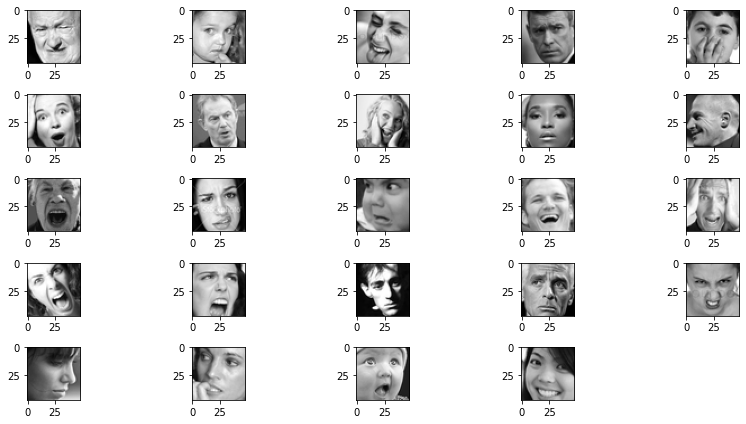

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
plt.figure(0, figsize=(12,6))
for i in range(1, 25):
    plt.subplot(5,5,i)
    plt.imshow(facial_df_pixels[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
from keras.utils import to_categorical
labels = facial_df["label"]
labels = to_categorical(labels)

X=facial_df_pixels
y=labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=1)

In [ ]:
labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
import numpy as np
import tensorflow as tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image

In [ ]:

model_1 = Sequential()

# Conv (evrişim katmanı)
model_1.add(Conv2D(64, (5, 5), activation='relu', padding="same", input_shape=(48,48,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Activation('relu'))

model_1.add(Conv2D(128, (5, 5), activation='relu', padding="same"))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Activation('relu'))

model_1.add(Conv2D(256, (3, 3), activation='relu', padding="same"))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(3,3)))
model_1.add(Activation('relu'))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.25))
model_1.add(Dense(7, activation='softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)      

In [ ]:
model_1.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model_1_hist = model_1.fit(X_train, y_train, batch_size = 64, epochs = 20,
                validation_data = (X_test , y_test))

Epoch 1/20
505/505 [==============================] - 5s 11ms/step - loss: 1.5847 - accuracy: 0.4085 - val_loss: 1.8019 - val_accuracy: 0.2563
Epoch 2/20
505/505 [==============================] - 5s 10ms/step - loss: 1.1508 - accuracy: 0.5683 - val_loss: 1.4898 - val_accuracy: 0.4004
Epoch 3/20
505/505 [==============================] - 5s 10ms/step - loss: 0.9640 - accuracy: 0.6413 - val_loss: 1.1422 - val_accuracy: 0.5846
Epoch 4/20
505/505 [==============================] - 5s 10ms/step - loss: 0.8386 - accuracy: 0.6927 - val_loss: 1.4353 - val_accuracy: 0.4335
Epoch 5/20
505/505 [==============================] - 5s 10ms/step - loss: 0.7041 - accuracy: 0.7461 - val_loss: 1.1950 - val_accuracy: 0.5531
Epoch 6/20
505/505 [==============================] - 5s 10ms/step - loss: 0.5721 - accuracy: 0.7954 - val_loss: 1.2715 - val_accuracy: 0.5358
Epoch 7/20
505/505 [==============================] - 5s 10ms/step - loss: 0.4509 - accuracy: 0.8373 - val_loss: 1.1780 - val_accuracy: 0.6289

In [ ]:
from keras.optimizers import Adam
model_1.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1e-3), 
              metrics=['accuracy'])
model_1_hist1 = model_1.fit(X_train, y_train, batch_size = 64, epochs = 20,
                validation_data = (X_test , y_test))


Epoch 1/20
505/505 [==============================] - 5s 11ms/step - loss: 0.0992 - accuracy: 0.9667 - val_loss: 1.6984 - val_accuracy: 0.6773
Epoch 2/20
505/505 [==============================] - 5s 10ms/step - loss: 0.0830 - accuracy: 0.9725 - val_loss: 1.7166 - val_accuracy: 0.6768
Epoch 3/20
505/505 [==============================] - 5s 10ms/step - loss: 0.0662 - accuracy: 0.9781 - val_loss: 1.7171 - val_accuracy: 0.6888
Epoch 4/20
505/505 [==============================] - 5s 10ms/step - loss: 0.0665 - accuracy: 0.9784 - val_loss: 1.8209 - val_accuracy: 0.6790
Epoch 5/20
505/505 [==============================] - 5s 10ms/step - loss: 0.0711 - accuracy: 0.9775 - val_loss: 1.7423 - val_accuracy: 0.7013
Epoch 6/20
505/505 [==============================] - 5s 10ms/step - loss: 0.0638 - accuracy: 0.9785 - val_loss: 1.8503 - val_accuracy: 0.6729
Epoch 7/20
505/505 [==============================] - 5s 10ms/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: 1.6914 - val_accuracy: 0.6918

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model_1.predict(X_test))


In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(3589, 48, 48, 1)
(3589, 7)
(32293, 48, 48, 1)
(32293, 7)


In [ ]:
acc = model_1_hist1.history["accuracy"]
val_acc = model_1_hist1.history["val_accuracy"]
loss = model_1_hist1.history["loss"]
val_loss = model_1_hist1.history["val_loss"]
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.9667420387268066, 0.9724708199501038, 0.9781067371368408, 0.978416383266449, 0.9774873852729797, 0.978509247303009, 0.981017529964447, 0.9799646735191345, 0.9790666699409485, 0.9800575971603394, 0.9854148030281067, 0.986158013343811, 0.9824729561805725, 0.9833400249481201, 0.9820704460144043, 0.9832471609115601, 0.9851051568984985, 0.9844858050346375, 0.9866225123405457, 0.9873037338256836]
[0.6773474216461182, 0.676790177822113, 0.6887712478637695, 0.6790192127227783, 0.7013095617294312, 0.6728894114494324, 0.6918361783027649, 0.6907216310501099, 0.65422123670578, 0.7054889798164368, 0.6653664112091064, 0.6826413869857788, 0.69239342212677, 0.6096405386924744, 0.6896071434020996, 0.6765115857124329, 0.6882140040397644, 0.6745611429214478, 0.6857063174247742, 0.7124547362327576]
[0.09915883839130402, 0.08297742158174515, 0.06622280180454254, 0.06646543741226196, 0.0711151733994484, 0.06383416801691055, 0.058363936841487885, 0.0618196502327919, 0.06386677175760269, 0.0608666613698005

In [ ]:
#Evaluating the Model
model_1.evaluate(X_test, y_test)

113/113 [==============================] - 0s 3ms/step - loss: 1.9554 - accuracy: 0.7125


[1.9554256200790405, 0.7124547362327576]

In [ ]:
#Making Prediction using the Model
import numpy as np
x_new = X_test[:10]
y_pred = model_1.predict_classes(x_new)
print(y_pred)
#np.array(class_names)[y_red]
y_new = y_test[:10]
y_new

[6 2 2 3 6 6 2 5 5 6]


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
#Making Prediction using the Model
import numpy as np
x_new = X_test[:10]
y_pred = model_1.predict_classes(x_new)
print(y_pred)
#np.array(class_names)[y_red]
y_new = y_test[:10]
y_new

[6 2 2 3 6 6 2 5 5 6]


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
 pred=model_1.predict_classes(X_test)
pred

array([6, 2, 2, ..., 2, 5, 5])

In [ ]:
import numpy as np
labels=np.argmax(y_test, axis=1)
labels

array([3, 2, 2, ..., 2, 5, 5])

In [ ]:
print(confusion_matrix(labels,pred))
print(classification_report(labels,pred))

[[357   7  17  23  60  14  33]
 [  0 522   0   0   0   0   0]
 [ 42   4 297  28  70  30  37]
 [ 14   1  15 382  41  19  49]
 [ 39   4  39  31 273  18  92]
 [ 14   1  10  11  15 447  12]
 [ 42   3  20  57 112   8 279]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       511
           1       0.96      1.00      0.98       522
           2       0.75      0.58      0.66       508
           3       0.72      0.73      0.73       521
           4       0.48      0.55      0.51       496
           5       0.83      0.88      0.85       510
           6       0.56      0.54      0.55       521

    accuracy                           0.71      3589
   macro avg       0.71      0.71      0.71      3589
weighted avg       0.72      0.71      0.71      3589



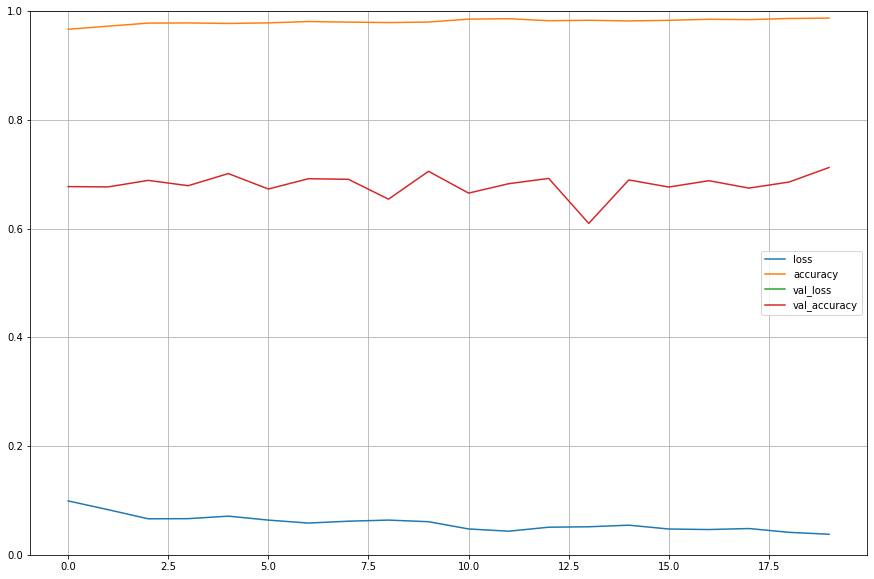

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(model_1_hist1.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
test_df1=pd.read_csv("/content/test.csv/test.csv")
test_df1.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [ ]:
test_df1.shape

(7178, 1)

In [ ]:
facial_df1_pixels = test_df1["pixels"] .str.split(" ").tolist()
facial_df1_pixels = np.uint8(facial_df1_pixels)
facial_df1_pixels = facial_df1_pixels.reshape((7178, 48, 48, 1))
facial_df1_pixels = facial_df1_pixels.astype("float32") / 255
facial_df1_pixels[0]

array([[[0.99607843],
        [0.99607843],
        [0.99607843],
        ...,
        [0.0627451 ],
        [0.        ],
        [0.6313726 ]],

       [[0.99607843],
        [0.99607843],
        [0.99607843],
        ...,
        [0.06666667],
        [0.        ],
        [0.47843137]],

       [[0.99607843],
        [0.99607843],
        [0.99607843],
        ...,
        [0.10196079],
        [0.        ],
        [0.44705883]],

       ...,

       [[0.25882354],
        [0.3372549 ],
        [0.3882353 ],
        ...,
        [1.        ],
        [0.9882353 ],
        [0.99607843]],

       [[0.32941177],
        [0.36078432],
        [0.36078432],
        ...,
        [0.9254902 ],
        [1.        ],
        [1.        ]],

       [[0.3647059 ],
        [0.3529412 ],
        [0.33333334],
        ...,
        [0.16470589],
        [0.5058824 ],
        [0.7058824 ]]], dtype=float32)

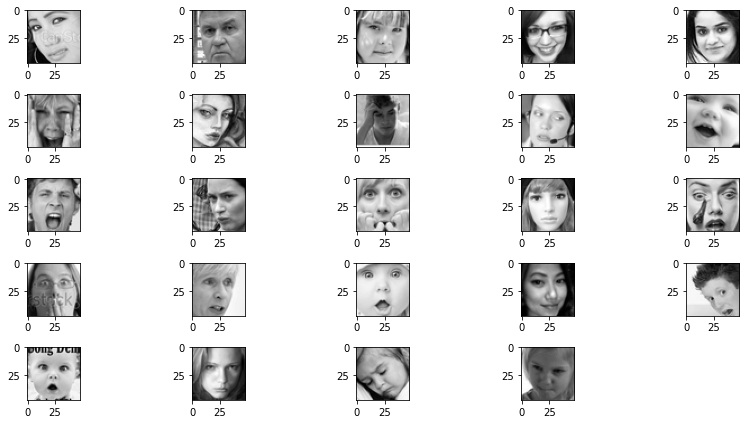

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
plt.figure(0, figsize=(12,6))
for i in range(1, 25):
    plt.subplot(5,5,i)
    plt.imshow(facial_df1_pixels[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
class_label=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]

In [ ]:
prediction=model_1.predict_classes(facial_df1_pixels)

In [ ]:
def answer(filename):
    result=model_1.predict_classes(filename)
    if(np.argmax(result)==0):
        print("angry")
    elif(np.argmax(result)==1):
        print("disgust")
    elif(np.argmax(result)==2):
         print("fear")
    elif(np.argmax(result)==3):
         print("happy")
    elif(np.argmax(result)==4):
         print("neutral")
    elif(np.argmax(result)==5):
         print("sad")
    elif(np.argmax(result)==6):
         print("surprise")


In [ ]:
!pip install pipwin
#!pipwin install jsonlib

In [ ]:
!pip install jsonlib-python3

In [ ]:
import json
import numpy as np
# serialize model to JSON
model_json = model_1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)



model_1.save_weights('first_try.h5')
print("Saved model to disk")


def answer(filename):
    result=model_1.predict_classes(filename)
    if(np.argmax(result)==0):
        print("angry")
    elif(np.argmax(result)==1):
        print("disgust")
    elif(np.argmax(result)==2):
         print("fear")
    elif(np.argmax(result)==3):
         print("happy")
    elif(np.argmax(result)==4):
         print("neutral")
    elif(np.argmax(result)==5):
         print("sad")
    elif(np.argmax(result)==6):
         print("surprise")

Saved model to disk


In [ ]:
submission=pd.DataFrame(prediction).to_csv("prediction")